In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TRAIN.csv')

In [3]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
# Convert variables to numeric features
df['Discount'] = df['Discount'].map({'Yes':1, 'No':0})
df = df.rename({'#Order':'Order'}, axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


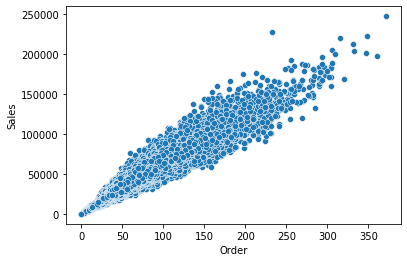

In [5]:
sns.scatterplot(df['Order'], df['Sales'])

In [6]:
df[['Order', 'Sales']].corr()

,Order,Sales
Order,1.000000,0.941601
Sales,0.941601,1.000000


In [13]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


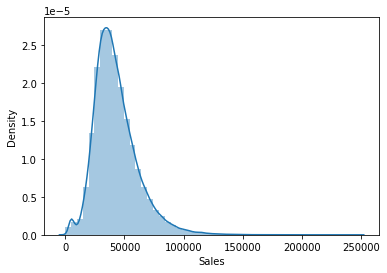

In [16]:
sns.distplot(df['Sales'])

In [17]:
test = pd.read_csv("TEST_FINAL.csv")

In [18]:
# Standardising test data as per train data
test['Date'] = pd.to_datetime(test['Date'])
test['Discount'] = test['Discount'].map({'Yes':1, 'No':0})

In [20]:
# Taking out day, month, and year from the date

df['year'] = df['Date'].dt.year
test['year'] = test['Date'].dt.year

df['month'] = df['Date'].dt.month
test['month'] = test['Date'].dt.month

df['day'] = df['Date'].dt.day
test['day'] = test['Date'].dt.day

In [21]:
# Drop date and ID features
df = df.drop('Date', axis=1)
test = test.drop('Date', axis=1)

df = df.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [26]:
from sklearn.model_selection import train_test_split

### EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


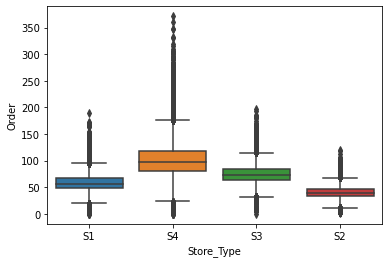

In [28]:
sns.boxplot(df['Store_Type'], df['Order'])

In [29]:
df.groupby('Store_Type')['Order'].describe()

,count,mean,std,min,25%,50%,75%,max
Store_Type,,,,,,,,
S1,88752.0,58.022095,16.349649,0.0,48.0,57.0,67.0,189.0
S2,28896.0,40.472799,11.835608,2.0,33.0,40.0,47.0,121.0
S3,24768.0,73.663396,19.018281,0.0,63.0,73.0,84.0,197.0
S4,45924.0,102.392779,33.733548,0.0,81.0,98.0,119.0,371.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


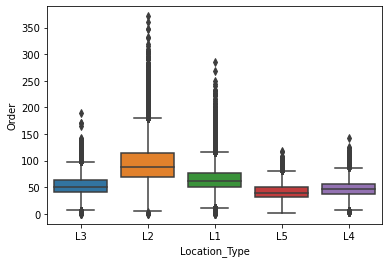

In [30]:
sns.boxplot(df['Location_Type'], df['Order'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


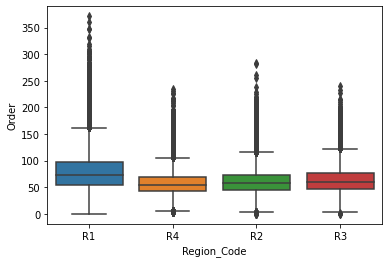

In [31]:
sns.boxplot(df['Region_Code'], df['Order'])

### Pycaret

In [39]:
df_pycaret = df.drop('Order', axis=1)

In [42]:
from pycaret.regression import *
exp1 = setup(df_pycaret, target = 'Sales')

,Description,Value
0,session_id,220
1,Target,Sales
2,Original Data,"(188340, 10)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(131837, 30)"


In [44]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6043.7378,7.769616e+07,8814.0113,0.7718,0.2337,0.1563,48.285
lightgbm,Light Gradient Boosting Machine,6382.1331,8.091791e+07,8994.6436,0.7624,0.2547,0.1776,0.984
et,Extra Trees Regressor,6656.7390,9.422215e+07,9706.4966,0.7232,0.2543,0.1719,49.270
gbr,Gradient Boosting Regressor,7658.4192,1.200110e+08,10953.8066,0.6476,0.3126,0.2332,14.175
dt,Decision Tree Regressor,7876.0591,1.328502e+08,11525.1672,0.6098,0.3160,0.1991,0.714
knn,K Neighbors Regressor,8153.1111,1.357404e+08,11649.5019,0.6014,0.3431,0.2654,1.335
lr,Linear Regression,8462.8503,1.468679e+08,12117.7959,0.5688,0.3373,0.2574,0.430
lasso,Lasso Regression,8461.7888,1.468682e+08,12117.8052,0.5688,0.3373,0.2574,3.988
ridge,Ridge Regression,8462.7913,1.468679e+08,12117.7962,0.5688,0.3373,0.2574,0.061
br,Bayesian Ridge,8462.6075,1.468679e+08,12117.7954,0.5688,0.3373,0.2574,0.296


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=220, verbose=0, warm_start=False)

In [43]:
# Fitting random forest
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5975.1124,7.745818e+07,8801.0326,0.7782,0.2586,0.1545
1,6013.6852,7.739480e+07,8797.4315,0.7720,0.2259,0.1552
2,6031.9253,7.602136e+07,8719.0231,0.7685,0.2261,0.1548
3,6097.5189,7.848033e+07,8858.9127,0.7760,0.2426,0.1566
4,6055.0909,7.884419e+07,8879.4253,0.7719,0.2109,0.1596
5,6003.4948,7.717610e+07,8784.9930,0.7604,0.2310,0.1573
6,6015.4652,7.780043e+07,8820.4550,0.7772,0.2080,0.1572
7,6162.1728,8.039313e+07,8966.2216,0.7662,0.2274,0.1585
8,6111.6286,7.938631e+07,8909.8993,0.7665,0.2805,0.1549
9,5971.2843,7.400677e+07,8602.7187,0.7811,0.2256,0.1546


In [65]:
params = {"max_depth": [3,4,6,8,10,15],
          "n_estimators": [10,50,100,200,500,800,1000,1200]}

In [66]:
tuned_rf = tune_model(rf, optimize = 'RMSLE', n_iter=3, fold=4, round=2, 
                      early_stopping=True, search_library = 'scikit-optimize', custom_grid = params)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7222.41,1.058705e+08,10289.34,0.69,0.28,0.20
1,7254.49,1.054997e+08,10271.30,0.69,0.28,0.20
2,7244.89,1.060577e+08,10298.43,0.69,0.27,0.21
3,7234.62,1.027294e+08,10135.55,0.70,0.29,0.19
Mean,7239.10,1.050393e+08,10248.66,0.69,0.28,0.20
SD,11.93,1.348645e+06,66.03,0.00,0.01,0.00


In [67]:
predictions = predict_model(tuned_rf, data = test)

In [68]:
test_original = pd.read_csv('TEST_FINAL.csv')
sub_1 = pd.DataFrame(test_original['ID'])
sub_1['Sales'] = pd.Series(predictions['Label'])
sub_1.to_csv('sub10.csv', index=False)

### Prediction without Pycaret

In [1]:
# df_dummies = pd.get_dummies(df)
# test_dummies = pd.get_dummies(test)
# df_dummies = df_dummies.drop('Order', axis=1)

# from lightgbm import LGBMRegressor
# lgb = LGBMRegressor()

# x = df_dummies.drop(['Sales'], axis=1)
# y = df_dummies['Sales']

# lgb.fit(x,y)

# test_pred = lgb.predict(test_dummies)

# test_original = pd.read_csv('TEST_FINAL.csv')
# sub_1 = pd.DataFrame(test_original['ID'])
# sub_1['Sales'] = pd.Series(test_pred)
# sub_1.to_csv('sub7.csv', index=False)